DST- is a Fourier-related transform similar to the discrete Fourier transform (DFT), but using a purely real matrix. It is equivalent to the imaginary parts of a DFT of roughly twice the length, operating on real data with odd symmetry (since the Fourier transform of a real and odd function is imaginary and odd), where in some variants the input and/or output data are shifted by half a sample.

DSTs are widely employed in solving partial differential equations by spectral methods, where the different variants of the DST correspond to slightly different odd/even boundary conditions at the two ends of the array.

Definition of DST:

$$
y_k = 2\sum^{N-1}_{n=0}x_n sin \Big ( \frac{\pi(k+1)(2n+1)}{2N}\Big)
$$

It assumes:
* input is odd around $n=-\frac{1}{2}$ and $n=N-\frac{1}{2}$
* output is odd around $k=-1$ and even around $k=N-1$

In [1]:
# 2D DST
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import dst
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
# image size - length of observation window
L_x = 1
L_y = 1

# space interval - sampling period
dx = 1/80
dy = 1/80

# discrete space
x = np.linspace(0.0,L_x,int(L_x/dx)+1)
y = np.linspace(0.0,L_y,int(L_y/dy)+1)
xv,yv = np.meshgrid(x,y)

# total number of information instants
N_x = x.shape[0]
N_y = y.shape[0]

# change these to see the spectrum-spread at low frequencies
p_x = 2
p_y = 2
Y = np.cos(10.0 * 2.0*np.pi*xv**p_x)*np.cos(20.0 * 2.0*np.pi*yv**p_y) 

# this is how to manually compute 2D dst as described in problem set 3 as well:
# Apply dst to each row in the array and then apply dst to each column of the resulting array
Y_dst = dst(dst(Y,axis=1), axis=0)

In [3]:
# sampling spatial frequency
Fs_x = 1/dx
Fs_y = 1/dy

# frequency intervals 
df_x = Fs_x/N_x
df_y = Fs_y/N_y

# discrte frequencies
xf = np.linspace(0.0,Fs_x,N_x)
yf = np.linspace(0.0,Fs_y,N_y)
xfv,yfv = np.meshgrid(xf,yf)

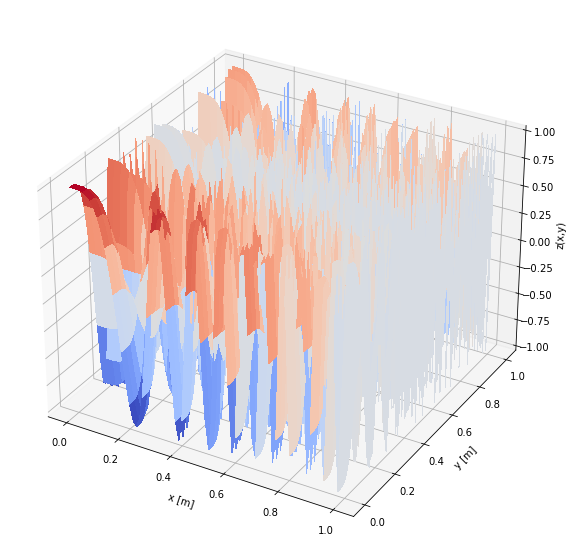

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xv,yv,Y,cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z(x,y)')
plt.show()

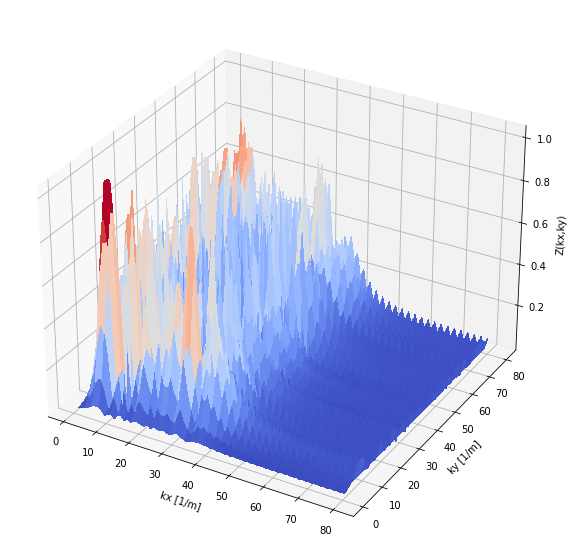

In [32]:
# keep half of the spectrum and normalize
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xfv[1:N_y,1:N_x],yfv[1:N_y,1:N_x],17.0/N_x/N_y * np.abs(Y_dst[1:N_y,1:N_x]),cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel('kx [1/m]')
ax.set_ylabel('ky [1/m]')
ax.set_zlabel('Z(kx,ky)')
plt.show()

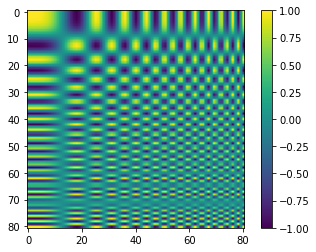

In [6]:
plt.imshow(Y)
plt.colorbar()
plt.show()

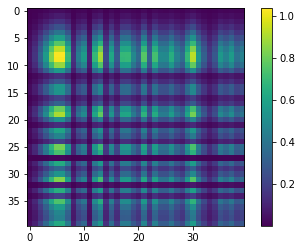

In [30]:
# keep half of the spectrum and normalize
plt.imshow(17.0/N_x/N_y * np.abs(Y_dst[1:N_y//2+1,1:N_x//2+1]))
plt.colorbar()
plt.show()

#### Types of DST and normalization https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.dst.html


In [11]:
from scipy.fftpack import dst, idst
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
x.shape[0]

5

In [12]:
# scaling factor 2*N = 10
idst(dst(x, type=2), type=2)

array([ 10.,  20.,  10., -10.,  15.])

In [13]:
# no scaling factor
idst(dst(x, type=2, norm='ortho'), type=2, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [14]:
# scaling factor 2*N = 10
idst(dst(x, type=3), type=3)

array([ 10.,  20.,  10., -10.,  15.])

In [15]:
# no scaling factor
idst(dst(x, type=3, norm='ortho'), type=3, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [16]:
# scaling factor 2*(N+1) = 12
idst(dst(x, type=1), type=1)

array([ 12.,  24.,  12., -12.,  18.])